<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Семён, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />    
Несмотря на то, что проект не такой уж и простой как с позиции кода, так и в понимании процессов - <br />тебе удалось сдать его вовремя, это большой плюс для всех нас, спасибо:)<br />
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
!pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
phone = pd.read_csv('final_provider/phone.csv')
contract = pd.read_csv('final_provider/contract.csv')
personal = pd.read_csv('final_provider/personal.csv')
internet = pd.read_csv('final_provider/internet.csv')

In [3]:
#contract = pd.read_csv('/datasets/final_provider/contract.csv')
#internet = pd.read_csv('/datasets/final_provider/internet.csv')
#personal = pd.read_csv('/datasets/final_provider/personal.csv')
#phone = pd.read_csv('/datasets/final_provider/phone.csv')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК, данные на базе)

In [4]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


In [5]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [7]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
И на месте первичный аналитический осмотр) 

Итак, что мы видим? Заключён контракт с 7043 пользователями, из которых только интернетом пользуются 5517 пользователей, только телефоном - 6361 пользователь. Необходимо уточнить, есть ли пропуски и пр.

In [12]:
print(phone['customerID'].duplicated().sum()),
print(contract['customerID'].duplicated().sum()),
print(personal['customerID'].duplicated().sum()),
print(internet['customerID'].duplicated().sum())

0
0
0
0


Ещё нужно понимать, ушёл уже клиент или нет.

In [13]:
contract['Actual'] = 1
contract.loc[contract['EndDate'] == 'No', 'Actual'] = 0
contract['Actual'] = contract['Actual'].astype('bool')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,True


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК

При более внимательном изучении мы видим, что есть клиенты, которые менее месяца, и TotalCharges нет. Нужно заполнить хотя бы месячной суммой.

In [14]:
contract.loc[contract['TotalCharges'] == ' ', 'TotalCharges'] = contract['MonthlyCharges']
contract['TotalCharges'] = contract['TotalCharges'].astype('float')

Также мы видим, что дата представлена весьма неудобно. Поправим это.

In [15]:
contract['EndDateNew']= contract['EndDate'].replace('No', '2020-02-01')
contract['BeginDate']= pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
contract['EndDate']= pd.to_datetime(contract['EndDate'], format='%Y-%m-%dT%H:%M:%S',errors='coerce')

Даты датами, но хорошо бы видеть число месяцев, сколько работаем с клиентом.

In [16]:
contract['begin_year'] = pd.DatetimeIndex(contract['BeginDate']).year
contract['end_year'] = pd.DatetimeIndex(contract['EndDateNew']).year
contract['begin_month'] = pd.DatetimeIndex(contract['BeginDate']).month
contract['end_month'] = pd.DatetimeIndex(contract['EndDateNew']).month
contract['Months'] = ((contract['end_year']- contract['begin_year']) * 12 + (contract['end_month'] - contract['begin_month']))
contract = contract.drop(['begin_year','end_year','begin_month','end_month', 'EndDateNew'], axis=1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОТЛИЧНО, что удаляешь факторы-даты!!!!! Если у нас тема НЕ временные ряды, то такие факторы лучше не использовать. Они "нагонят" метрики, но бизнес-эффективность модели  - рухнет.

In [17]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual,Months
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,False,1
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,False,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,2
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,False,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,2


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>есть контакт)

In [18]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             1869 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Actual              7043 non-null bool
Months              7043 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 502.2+ KB


Соответственно, объединим всё в один датафрейм.

In [19]:
data = contract.merge(personal, on='customerID', how='left')
data = data.merge(phone, on='customerID', how='left')
data = data.merge(internet, on='customerID', how='left')

Заполним пропуски.

In [20]:
for k in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    data[k] = data[k].fillna('NA')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, понятно)

И создадим ещё признак, по которому будет ясно, использует ли он только Интернет, или только телефон (0 - всё, 1 - интернет, 2 - телефон).

In [21]:
data['Services'] = 0 
data.loc[data['MultipleLines'] == 'NA', 'Services'] = 1 
data.loc[data['InternetService'] == 'NA', 'Services'] = 2
data['EndDate'] = data['EndDate'].fillna('No')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Actual              7043 non-null bool
Months              7043 non-null int64
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 n

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК

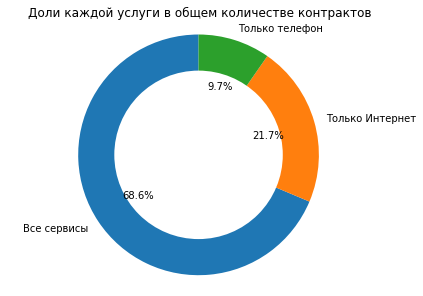

In [23]:
labels = ['Все сервисы', 'Только Интернет', 'Только телефон']
sizes = data['Services'].value_counts().values
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("Доли каждой услуги в общем количестве контрактов")
plt.show()

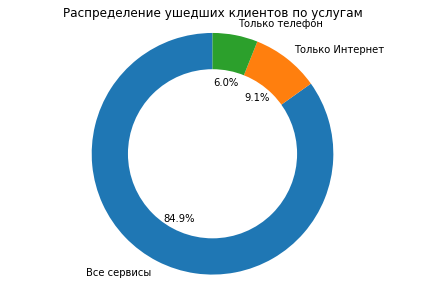

In [24]:
labels = ['Все сервисы', 'Только Интернет', 'Только телефон']
actual_data = data.query('Actual == 1')
sizes = actual_data['Services'].value_counts().values
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("Распределение ушедших клиентов по услугам")
plt.show()

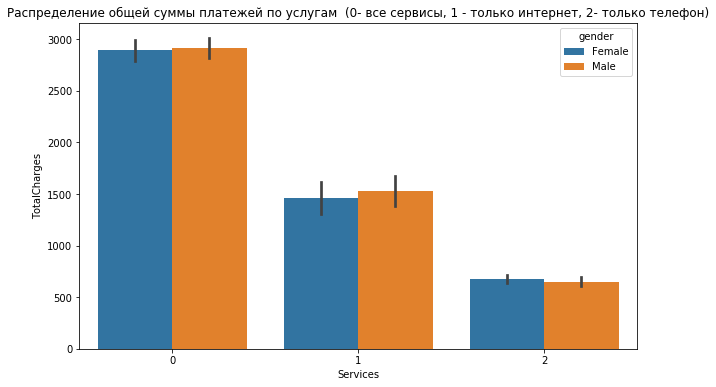

In [25]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Services", y="TotalCharges", hue="gender",  data=data)
plt.title("Распределение общей суммы платежей по услугам  (0- все сервисы, 1 - только интернет, 2- только телефон)")
plt.show()

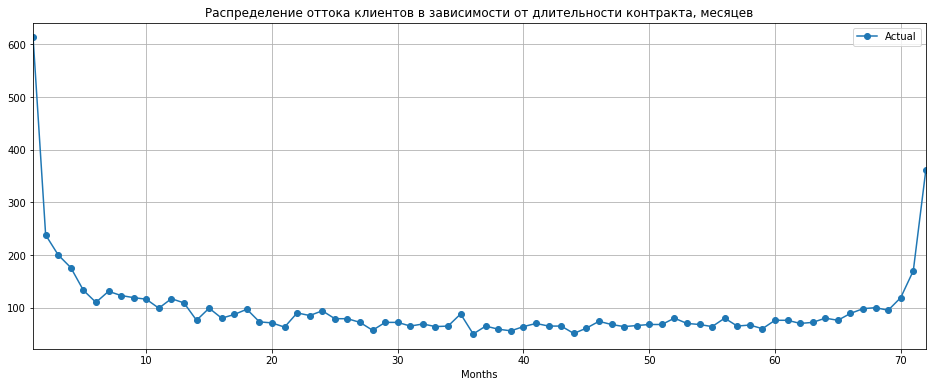

In [26]:
data.pivot_table(values = 'Actual', index ='Months', aggfunc='count').query('Months > 0').plot(style='o-', grid=True,figsize=(16, 6))
plt.title("Распределение оттока клиентов в зависимости от длительности контракта, месяцев")
plt.show()

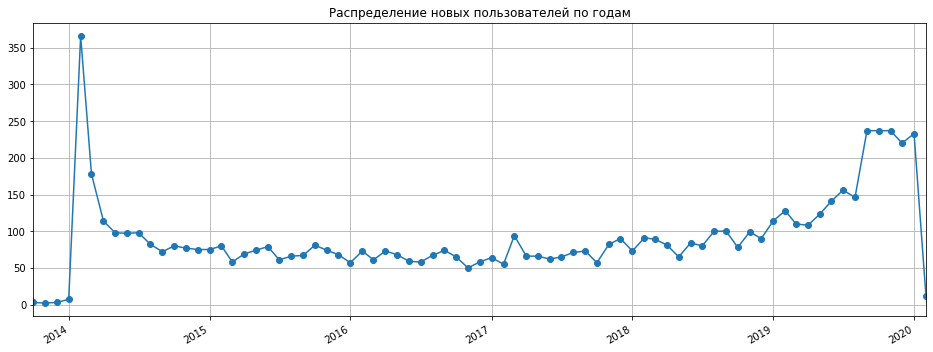

In [27]:
data['BeginDate'].value_counts().plot(style='o-', grid=True,figsize=(16, 6))
plt.title("Распределение новых пользователей по годам")
plt.show()

## Выводы

1. Мы подготовили данные для обработки, удалили пропуски и привели типы, добавили признаки числа месяца и статус клиента (ушёл или нет),
2. Получили данные о том, что 69% клиентов пользуются нашими обеими услугами, 10% пользуются только телефоном, 21% - только интернетом.
3. Клиенты уходят не пропорционально общему распределению - следовательно, проблема не в какой-либо услуге,
4. Прирост пользователей пошёл примерно с 2018 года, особенно ярко с 2019.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОТЛИЧНО с визулизацией!!! Замечу только, что графический анализ - это предположение/гипотеза о влиянии факторв на целевую.  И чтобы подтвердить/опровергнуть его - применяют аналитические методы проверки гипотез (спринт 4, например).

# План решения

1. Разбить датасет на трейн, валид, тест,
2. Исследовать рэндом_форест, логистическую регрессию, ближайших соседей, может что-то ещё. Подобрать параметры для гиперпараметры для LGBMClassifier,
3. Аналогично для CatBoostClassifier,
4. Для лучших моделей посчитать метрику и выбрать победителя,
5. Описать ключевые задачи, итоговый результат для выбранной модели.

<div class='alert alert-danger'>
Привет. План получился слегка сумбурным, не понятно почему построение модели Catboost выделено в отдельные шаг. Не хватает этапа с исследованием данным и предобработки. Не пнятно почему метрика считается только для лучших моделей, каким тогда образом вообще понять какая модель является лучшей ? 

<div class='alert alert-info'>
Здравствуй, мой безымянный друг! К сожалению, из-за сроков по личным причинам я уже не смогу в ближайшую неделю к нему вернуться (экзамены). Пожалуйста, пришли более подробные комментарии, что надо исправить. Если тебя корёжит от 3-го пункта и его надо сконкатенировать со вторым - это одно. А если целого этапа не хватает - то напиши, что именно там должно быть. У меня исследование и предобработка, по моему мнению, проведены. И свой план тоже есть, хотя понятно, я с задачей, в отличие от тебя, не знаком, поэтому что-то будет прояснено в процессе.</div>

<div class='alert alert-warning'>
Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.

Шаги должны обобщать некоторые действия. То что ты прописал это конкретные действия в рамках одного шага. Например пункт 2 и 3 это этам моделирования. Так можешь и назвать данный шаг, сделав к нему комментарий что ты там внутри будешь более детально делать. Цель составления плана заключается в том, чтобы ты смог обобщить и выделить наиболее характерные этапы работы с данными при построении модели. Эти этапы являются универсальны при построении любой модели. 

<div class='alert alert-info'>Ок, вот вариант. Хочется быстрее приступить, так как, даже если есть непонятные вещи на первом этппе, они могут быть прояснены в дальнейшем. Тут работы на пару часов.</div>

1. Подготовка данных: запонение пробелов, добавление ключевых столбца, разбиение датасета на трейн, валид, тест,
2. Моделирование: Исследовать рэндом_форест, логистическую регрессию, ближайших соседей, может что-то ещё. Подобрать параметры для гиперпараметры для LGBMClassifier, аналогично для CatBoostClassifier,
3. Исследование результатов: Выявляем слабые стороны моделей, обращаем внимание не только на подбор значений гиперпараметров, но и на то, какие из них оказывают наибольшее влияние на модель,
4. Вывод: Из наилучших моделей считаем метрику на тестовой выборке и делаем выбор победителя.

<div class='alert alert-success'>
<b>Комментарий тимлида</b>

Отличный получился план, можешь продолжать работу над проектом.

Закодируем признаки.

In [28]:
df = data
df = df.drop(['BeginDate', 'EndDate'], axis=1)

df_to_ohe = df.drop(['customerID', 'MonthlyCharges', 'TotalCharges', 'Actual', 'Months'], axis=1)
df_no_ohe = df[['customerID', 'MonthlyCharges', 'TotalCharges', 'Actual', 'Months']]
df_to_ohe = pd.get_dummies(df_to_ohe, drop_first=True)

df = df_no_ohe.join(df_to_ohe).drop(['customerID'], axis=1)

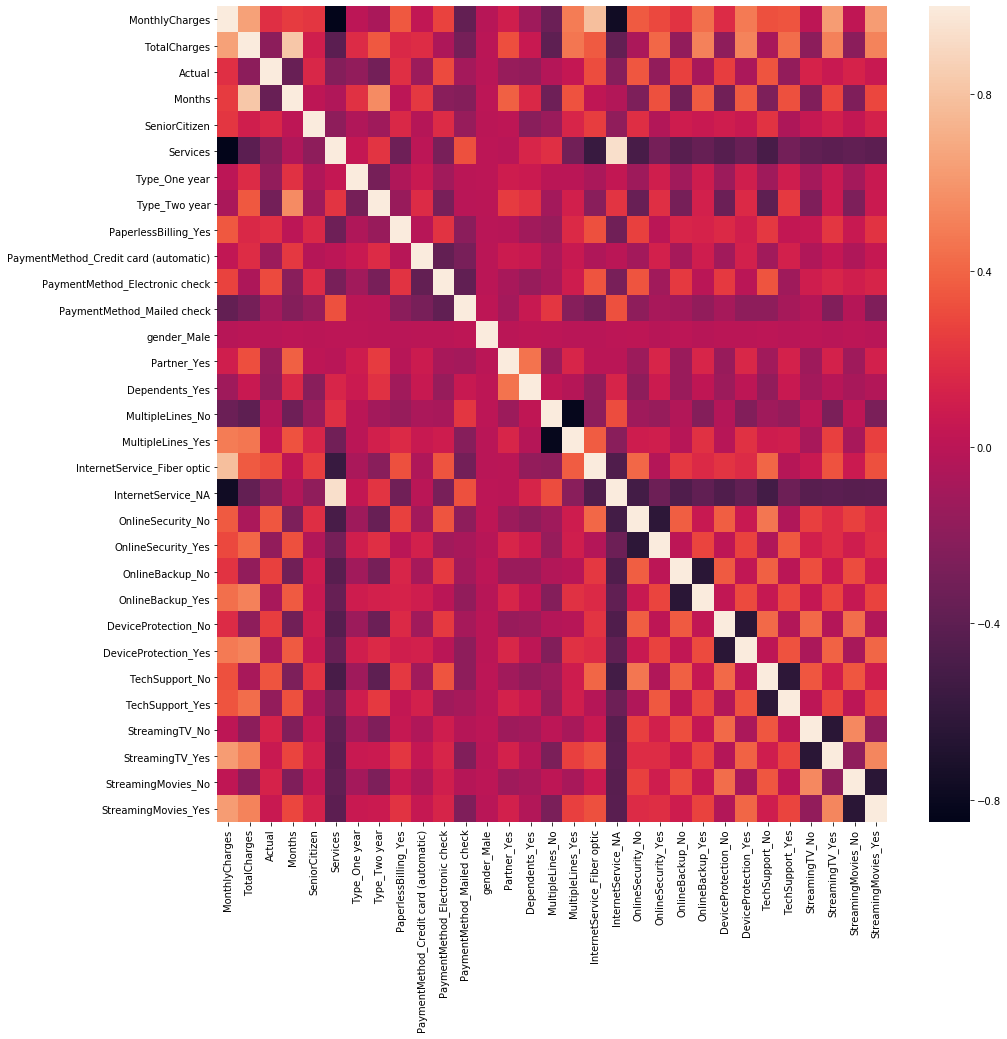

In [29]:
corrMatrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=False)

Собственно, разобъём датасет.

<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК, работа с мультиколлинеарностью - важна. Но есть важный момент по корреляциям: данная корреляция Спирмена/Пирсона - разрабатывался для количественных шкал. Если данные в бинарной шкале (пол, тип услуги....) - техника не подходит, лучше не опираться на данные выводы.<br>
    
Поэтому выводы (а вот и выводов - вообще нет)))) можно делать только по количественным данным (в нашем случае - финансы и длительность контракта)

In [30]:
target = df['Actual']
features = df.drop('Actual', axis=1)
features_other, features_test, target_other, target_test = train_test_split(
    features, target, test_size=0.2, random_state=2576)
features_train, features_valid, target_train, target_valid = train_test_split(
   features_other, target_other, test_size=0.25, random_state=2576)

print('features_train', len(features_train))
print('features_valid', len(features_valid))
print('features_test', len(features_test))

features_train 4225
features_valid 1409
features_test 1409


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК

Создадим функцию.

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train, target_train = upsample(features_train, target_train, 3)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>только трайн балансируем, ок.

В time запишем лучший результат на валидационной выборке по каждой модели

In [32]:
%%time
total_result = pd.DataFrame(columns = ['model', 'roc_auc_valid', 'recall_valid', 'precision_valid'])

Wall time: 2.99 ms


Исследуем дерево.

In [33]:
tree_result = pd.DataFrame()
i= 0

for depth in range(1, 21, 1):
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model_tree.fit(features_train, target_train)
    
    predictions_tree_train = model_tree.predict(features_train)
    predictions_tree_valid = model_tree.predict(features_valid)
    tree_result.loc[i, 'depth'] = depth
    tree_result.loc[i, 'f1_train'] = f1_score(target_train, predictions_tree_train)
    tree_result.loc[i, 'f1_valid'] = f1_score(target_valid, predictions_tree_valid)
    tree_result.loc[i, 'roc_auc_train'] = roc_auc_score(target_train, predictions_tree_train)
    tree_result.loc[i, 'roc_auc_valid'] = roc_auc_score(target_valid, predictions_tree_valid)
    tree_result.loc[i, 'recall_valid'] = recall_score(target_valid, predictions_tree_valid)
    tree_result.loc[i, 'precision_valid'] = precision_score(target_valid, predictions_tree_valid)
    i +=1
    

total_result.loc[0,'model'] = 'DecisionTreeClassifier'
total_result.loc[0,'roc_auc_valid'] = tree_result['roc_auc_valid'].max()

max_ = tree_result['roc_auc_valid'].max()
ind =  (tree_result.query('roc_auc_valid == @max_').index).values[0]

total_result.loc[0,'recall_valid'] = tree_result.loc[ind,'recall_valid']
total_result.loc[0,'precision_valid'] = tree_result.loc[ind,'precision_valid']

tree_result

,depth,f1_train,f1_valid,roc_auc_train,roc_auc_valid,recall_valid,precision_valid
0,1.0,0.712126,0.543796,0.683055,0.677842,0.752525,0.425714
1,2.0,0.615819,0.546479,0.684724,0.685719,0.489899,0.617834
2,3.0,0.745647,0.584521,0.732236,0.714792,0.724747,0.489761
3,4.0,0.756264,0.617989,0.748898,0.741836,0.737374,0.531876
4,5.0,0.779661,0.598309,0.767703,0.725536,0.714646,0.514545
5,6.0,0.799179,0.618106,0.785095,0.742720,0.750000,0.525664
6,7.0,0.819499,0.593952,0.806314,0.721358,0.694444,0.518868
7,8.0,0.850657,0.583593,0.835028,0.713633,0.709596,0.495591
8,9.0,0.873046,0.566120,0.863177,0.698689,0.654040,0.499037
9,10.0,0.903355,0.584885,0.893274,0.713725,0.674242,0.516441


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>бодренько)))

Теперь лес.

In [34]:
%%time
forest_result = pd.DataFrame(columns = ['estim', 'depth', 'roc_auc_train', 'roc_auc_valid'])
i= 0
for estim in range(5, 51, 5):
    for depth in range(2, 11, 2):
        model_forest = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345, class_weight='balanced')
        model_forest.fit(features_train, target_train)
        predictions_forest_train = model_forest.predict(features_train)
        predictions_forest_valid = model_forest.predict(features_valid)
 
        forest_result.loc[i, 'estim'] = estim
        forest_result.loc[i, 'depth'] = depth
        forest_result.loc[i, 'roc_auc_train'] = roc_auc_score(target_train, predictions_forest_train)
        forest_result.loc[i, 'roc_auc_valid'] = roc_auc_score(target_valid, predictions_forest_valid)
        forest_result.loc[i, 'recall_valid'] = recall_score(target_valid, predictions_forest_valid)
        forest_result.loc[i, 'precision_valid'] = precision_score(target_valid, predictions_forest_valid)
        i +=1
    
total_result.loc[1,'model'] = 'RandomForestClassifier'
total_result.loc[1,'roc_auc_valid'] = forest_result['roc_auc_valid'].max()

max_ = forest_result['roc_auc_valid'].max()
ind =  (forest_result.query('roc_auc_valid == @max_').index).values[0]
total_result.loc[1,'recall_valid'] = forest_result.loc[ind,'recall_valid']
total_result.loc[1,'precision_valid'] = forest_result.loc[ind,'precision_valid']

forest_result  

Wall time: 4.6 s


,estim,depth,roc_auc_train,roc_auc_valid,recall_valid,precision_valid
0,5.0,2.0,0.742079,0.726753,0.734848,0.505208
1,5.0,4.0,0.750918,0.731896,0.709596,0.530189
2,5.0,6.0,0.789667,0.769442,0.777778,0.560000
3,5.0,8.0,0.827894,0.766572,0.742424,0.581028
4,5.0,10.0,0.887868,0.729853,0.681818,0.545455
5,10.0,2.0,0.744496,0.735373,0.755051,0.509370
6,10.0,4.0,0.755437,0.739701,0.744949,0.523050
7,10.0,6.0,0.792584,0.769063,0.787879,0.552212
8,10.0,8.0,0.830635,0.753957,0.739899,0.554924
9,10.0,10.0,0.897513,0.744557,0.694444,0.569358


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ветвистый лес))ОК

<div class='alert alert-info'>Например, график важности факторов для леса:</div>

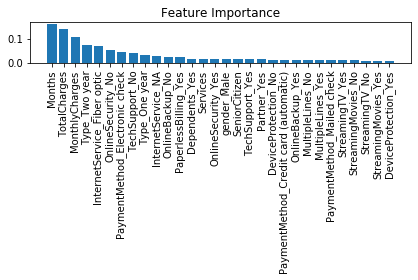

In [35]:
importances = model_forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(features_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(features_train.shape[1]), features_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Логистическая регрессия:

In [36]:
model_log = LogisticRegression(random_state=12345, class_weight='balanced')
model_log.fit(features_train, target_train)
predictions_log_train = model_log.predict(features_train)
predictions_log_valid = model_log.predict(features_valid)
roc_auc_log_train = roc_auc_score(target_train, predictions_log_train)
roc_auc_log_valid = roc_auc_score(target_valid, predictions_log_valid)
recall_log_valid = recall_score(target_valid, predictions_log_valid)
precision_log_valid = precision_score(target_valid, predictions_log_valid)
print('Качество на обучающей выборке:', roc_auc_log_train )
print('Качество на валидационной выборке:', roc_auc_log_valid )

total_result.loc[2,'model'] = 'LogisticRegression'
total_result.loc[2,'roc_auc_valid'] = roc_auc_log_valid
total_result.loc[2,'recall_valid'] = recall_log_valid
total_result.loc[2,'precision_valid'] = precision_log_valid

Качество на обучающей выборке: 0.7636832066551628
Качество на валидационной выборке: 0.7499626073170003


C:\Users\Uglev\anaconda3\envs\praktikum\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Метод ближайших соседей.

In [37]:
neigh_result = pd.DataFrame(columns = ['n_neighbors', 'roc_auc_train', 'roc_auc_valid'])
i= 0
for n in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(features_train, target_train)
    prediction_neigh_train = neigh.predict(features_train)
    prediction_neigh_valid = neigh.predict(features_valid)
    neigh_result.loc[i, 'n_neighbors'] = n
    neigh_result.loc[i, 'roc_auc_train'] = roc_auc_score(target_train, prediction_neigh_train)
    neigh_result.loc[i, 'roc_auc_valid'] = roc_auc_score(target_valid, prediction_neigh_valid)
    neigh_result.loc[i, 'recall_valid'] = recall_score(target_valid, prediction_neigh_valid)
    neigh_result.loc[i, 'precision_valid'] = precision_score(target_valid, prediction_neigh_valid)
    i +=1    

total_result.loc[3,'model'] = 'KNeighborsClassifier'
total_result.loc[3,'roc_auc_valid'] = neigh_result['roc_auc_valid'].max()

max_ = neigh_result['roc_auc_valid'].max()
ind =  (neigh_result.query('roc_auc_valid == @max_').index).values[0]
total_result.loc[3,'recall_valid'] = neigh_result.loc[ind,'recall_valid']
total_result.loc[3,'precision_valid'] = neigh_result.loc[ind,'precision_valid']

neigh_result

,n_neighbors,roc_auc_train,roc_auc_valid,recall_valid,precision_valid
0,1.0,0.998602,0.65149,0.474747,0.519337
1,2.0,0.998602,0.65149,0.474747,0.519337
2,3.0,0.901052,0.677579,0.664141,0.456597
3,4.0,0.901052,0.677579,0.664141,0.456597
4,5.0,0.838432,0.674709,0.737374,0.426277
5,6.0,0.79699,0.694098,0.575758,0.545455
6,7.0,0.791393,0.694017,0.633838,0.502000
7,8.0,0.791393,0.694017,0.633838,0.502000
8,9.0,0.786493,0.701615,0.694444,0.482456
9,10.0,0.786652,0.701615,0.694444,0.482456


In [38]:
cat_features = [c for c, col in enumerate(features_train.columns) if col not in (df_no_ohe.columns)]

гиперпараметры для LGBMClassifier:

estimator = lgb.LGBMClassifier(class_weight='balanced', boosting_type = 'gbdt', objective='binary', random_state=2576, reg_alpha = 0, metric = 'auc', max_depth = 1, silent=True)

param_grid = { 'learning_rate': [0.01, 0.1 ,0.5], 'n_estimators': [2,10,60], 'min_child_samples' : [10,50,100]

}

cv =KFold(random_state=2576, n_splits=7) gbm = GridSearchCV(estimator, param_grid, cv=cv, scoring='roc_auc')

gbm.fit(features_train, target_train, categorical_feature=cat_features) #, eval_metric ='auc',eval_set =[(features_valid, target_valid)] )

print('Best parameters is:', gbm.bestparams) print('Best score is:', gbm.bestscore)

In [39]:
model_lgb = lgb.LGBMClassifier(learning_rate=0.5, max_depth=1, n_estimators=60, min_child_samples = 10, class_weight='balanced',
                               reg_alpha = 0,objective='binary', metric = 'auc', random_state=2576)
model_lgb.fit(features_train, target_train, categorical_feature=cat_features)

probabilities_valid = model_lgb.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

lgb_score = roc_auc_score(target_valid, probabilities_one_valid)
recall_lgb_valid = recall_score(target_valid, probabilities_one_valid.round())
precision_lgb_valid = precision_score(target_valid, probabilities_one_valid.round())

total_result.loc[4,'model'] = 'LGBMClassifier'
total_result.loc[4,'roc_auc_valid'] = lgb_score
total_result.loc[4,'recall_valid'] = recall_lgb_valid
total_result.loc[4,'precision_valid'] = precision_lgb_valid

C:\Users\Uglev\anaconda3\envs\praktikum\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


In [40]:
total_result

,model,roc_auc_valid,recall_valid,precision_valid
0,DecisionTreeClassifier,0.74272,0.75,0.525664
1,RandomForestClassifier,0.773115,0.775253,0.569573
2,LogisticRegression,0.749963,0.757576,0.534759
3,KNeighborsClassifier,0.730082,0.70202,0.531549
4,LGBMClassifier,0.849327,0.792929,0.545139


гиперпараметры для CatBoostClassifier:

In [41]:
model_cb_1 = CatBoostClassifier(depth = 10, learning_rate = 0.1, l2_leaf_reg = 1, eval_metric='AUC', random_state=2576)
model_cb_1.fit(features_train, target_train, verbose=100, plot=True)

probabilities_valid = model_cb_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


total_result.loc[5,'model'] = 'CatBoostClassifier_1'
total_result.loc[5,'roc_auc_valid'] = roc_auc_score(target_valid, probabilities_one_valid)
total_result.loc[5,'recall_valid'] = recall_score(target_valid, probabilities_one_valid.round())
total_result.loc[5,'precision_valid'] = precision_score(target_valid, probabilities_one_valid.round())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 147ms	remaining: 2m 27s
100:	total: 1.29s	remaining: 11.5s
200:	total: 2.41s	remaining: 9.58s
300:	total: 3.56s	remaining: 8.27s
400:	total: 4.69s	remaining: 7.01s
500:	total: 5.84s	remaining: 5.82s
600:	total: 6.99s	remaining: 4.64s
700:	total: 8.17s	remaining: 3.49s
800:	total: 9.31s	remaining: 2.31s
900:	total: 10.4s	remaining: 1.15s
999:	total: 11.6s	remaining: 0us


Для проверки попробуем CatBoost "из коробки":

In [42]:
model_cb_2 = CatBoostClassifier(eval_metric='AUC')
model_cb_2.fit(features_train, target_train, verbose=100, plot=True)

probabilities_valid = model_cb_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

total_result.loc[6,'model'] = 'CatBoostClassifier_2'
total_result.loc[6,'roc_auc_valid'] = roc_auc_score(target_valid, probabilities_one_valid)
total_result.loc[6,'recall_valid'] = recall_score(target_valid, probabilities_one_valid.round())
total_result.loc[6,'precision_valid'] = precision_score(target_valid, probabilities_one_valid.round())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.022759
0:	total: 16.6ms	remaining: 16.6s
100:	total: 255ms	remaining: 2.27s
200:	total: 476ms	remaining: 1.89s
300:	total: 766ms	remaining: 1.78s
400:	total: 1.08s	remaining: 1.62s
500:	total: 1.3s	remaining: 1.3s
600:	total: 1.58s	remaining: 1.05s
700:	total: 1.86s	remaining: 793ms
800:	total: 2.26s	remaining: 562ms
900:	total: 2.51s	remaining: 276ms
999:	total: 2.72s	remaining: 0us


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК, тут predict_proba() нам и нужен!

In [43]:
total_result.sort_values(by = 'roc_auc_valid', ascending = False)

,model,roc_auc_valid,recall_valid,precision_valid
4,LGBMClassifier,0.849327,0.792929,0.545139
6,CatBoostClassifier_2,0.836871,0.70202,0.569672
5,CatBoostClassifier_1,0.80927,0.540404,0.62029
1,RandomForestClassifier,0.773115,0.775253,0.569573
2,LogisticRegression,0.749963,0.757576,0.534759
0,DecisionTreeClassifier,0.74272,0.75,0.525664
3,KNeighborsClassifier,0.730082,0.70202,0.531549


Наилучшими у нас оказались 3 модели: LGBMClassifier, CatBoostClassifier_2 и CatBoostClassifier_1. Для них посчитаем метрику на тестовой выборке и выберем победителя. Дополнительно посмотрим на accuracy и матрицы ошибок. Кстати, интересно, что CatBoostClassifier с дефолтными настройками показал себя чуть лучше чем тот, для которого гиперпараметры подбирались.

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
test_result = pd.DataFrame(columns = ['model', 'roc_auc_test', 'accuracy_test'])

model_lgb.fit(features_train, target_train, categorical_feature=cat_features)
probabilities_test = model_lgb.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

test_result.loc[0,'model'] = 'LGBMClassifier'
test_result.loc[0,'roc_auc_test'] = roc_auc_score(target_test, probabilities_one_test)
test_result.loc[0,'accuracy_test'] = accuracy_score(target_test, probabilities_one_test.round())

confusion_matrix(target_test, probabilities_one_test.round())

C:\Users\Uglev\anaconda3\envs\praktikum\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


array([[769, 254],
       [ 63, 323]], dtype=int64)

In [45]:
probabilities_test = model_cb_1.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

test_result.loc[1,'model'] = 'CatBoostClassifier_1'
test_result.loc[1,'roc_auc_test'] = roc_auc_score(target_test, probabilities_one_test)
test_result.loc[1,'accuracy_test'] = accuracy_score(target_test, probabilities_one_test.round())

confusion_matrix(target_test, probabilities_one_test.round())

array([[897, 126],
       [172, 214]], dtype=int64)

In [46]:
probabilities_test = model_cb_2.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

test_result.loc[2,'model'] = 'CatBoostClassifier_2'
test_result.loc[2,'roc_auc_test'] = roc_auc_score(target_test, probabilities_one_test)
test_result.loc[2,'accuracy_test'] = accuracy_score(target_test, probabilities_one_test.round())

confusion_matrix(target_test, probabilities_one_test.round())

array([[812, 211],
       [ 97, 289]], dtype=int64)

In [47]:
test_result.sort_values(by = 'roc_auc_test', ascending = False)

,model,roc_auc_test,accuracy_test
0,LGBMClassifier,0.880825,0.775018
2,CatBoostClassifier_2,0.863169,0.781405
1,CatBoostClassifier_1,0.837761,0.788502


Accuracy у LGBMClassifier хуже, чем у представленных трех моделей, но в целом, значение неплохое и не сильно отрывается от остальных моделей. А матрица ошибок у LGBMClassifier показывает, что эта модель - лидер по поиску истинноположительных ответов. Это говорит о том, что она с большей вероятностью по сравнению с остальными моделями найдёт тех клиентов, которые собираются уйти.

In [48]:
test_result.head(1)

,model,roc_auc_test,accuracy_test
0,LGBMClassifier,0.880825,0.775018


<b>Вывод.</b> А вот и ответ. Моей итоговой моделью является LGBMClassifier с указанными значениями метрик. Также, обращаю внимание на злую шутку, а именно, на важность не только подбора значений гиперпараметров, но и определение, какие из них оказывают наибольшее влияние на модель. Некоторые работают неплохо "из коробки".

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Семён, скажу, что уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
А что совсем хорошо, так это то, что не стал гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки, многие их вставляют...)<br>

Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования (что-то ты и так хорошо используешь):<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- Оцениваем мультиколлинеарность.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

<font color='red'>
Есть пару-тройку не ошибок, а вопросов для дополнений:<br>
1)При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы имеют сильную корреляцию друг с другом - больше 0.8).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее). У тебя есть тепловая карта Там я оставил ещё комментарий.<br><br>
2) Будет здорово, если построишь график важности факторов<br>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Просто эти два пункта - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

<div class='alert alert-info'>День добрый! Интересные замечания! По feature importance понял, график важности построил для леса - см. мой комментарий.
Про мультиколлинеарность - да, помню. На консультации Александр нам говорил считать коллинеарными признаки, у которых корреляция в районе 0.90-0.95 (и выше). Для этого вроде помогает heatmap, внутрь вызова надо засунуть вычисление корреляции признаков.
P.S. Твои пути восстановил для удобства. ) </div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
Привет, Семён! ОК, спасибо) С важностью - увидел (но лучше его оформлять чуть призентабельнее - это один из ключевых будет графиков при общении с клиентов на бизнес-темы)).<br> C мультиколлинеарностью - ОК (Спирмен/Пирсон - только для количественных шкал)<br>
ОК, в общем-то всё)<br>
Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>

В конце Jupyter Notebook с кодом решения задачи напишите отчёт. Его проверит тимлид, а к коду обратится в случае возникновения спорных моментов.
В отчёте ответьте на вопросы:

    Какие пункты плана были выполнены, а какие — нет (поясните почему)?
    Какие трудности возникли и как вы их преодолели?
    Какие ключевые шаги в решении задачи выделили?
    Какая ваша итоговая модель и какое у неё качество?

На что обращает внимание тимлид, проверяя проект:

    Ответили на все вопросы или нет?
    Понятны ли ответы на вопросы?

# Ответы на вопросы

1. Были выполнены все пункты плана,
2. Трудности были, как и неожиданности - например, оказалось, что важен не только подбор значений гиперпараметров, но и определение, какие из них оказывают наибольшее влияние на модель (из коробки может работать лучше). Ещё можно выделить оценку мультиколлинеарности и график важности факторов (буду теперь знать),
3. Ключевые шаги - подготовка данных, моделирование, исследование, вывод,
4. Моей итоговой моделью является LGBMClassifier, значение roc_auc 0.880825, accuracy 0.775018.

<div class='alert alert-success'>
Отличная работа, поздравляю с завершением проекта. Чуть позже еще вернусь с индивидуальной обратной связью в лс слака.